# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

1. AFIA HASNA (10124047)
2. ARIYO SENO	(10124198)
3. BAHARUDIN NUBAN (10124243)
4. CINDYA FIRDANA NAOMIRA VEDARAMA	(10124285)
5. DIO NUGROHO (10124361)

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Mengambil file .csv dari Google Drive kamu.

In [49]:
# Upload file .CSV ke notebook
df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP/housing_data.csv', sep=';')

In [56]:
df.head()

,"price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus"
0,"13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,fur..."
1,"12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furn..."
2,"12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,sem..."
3,"12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,fu..."
4,"11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,fu..."


In [57]:
df.shape

(545, 1)

In [61]:
df.tail()

,"price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus"
540,"1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfur..."
541,"1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-fu..."
542,"1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurn..."
543,"1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished"
544,"1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurn..."


In [62]:
df.describe(include='all')

,"price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus"
count,545
unique,545
top,"1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurn..."
freq,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 1 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus  545 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


In [63]:

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP/housing_data.csv', sep=',')  # Gantilah 'namafile.csv' sesuai nama file asli
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [78]:
df.shape

(530, 13)

In [79]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [80]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [64]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [82]:
#Menangani Nilai Hilang

threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [83]:
# Isi nilai numerik yang hilang dengan median
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [84]:
# Isi nilai kategorikal yang hilang dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [93]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]


In [86]:
#Bersihkan outlier di kolom 'price' jika ada
if 'price' in df.columns:
    df = remove_outliers_iqr(df, 'price')


In [87]:
# Encode kolom kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)


In [88]:
# Normalisasi kolom numerik (opsional)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 19 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             526 non-null    int64 
 1   area              526 non-null    int64 
 2   bedrooms          526 non-null    int64 
 3   bathrooms         526 non-null    int64 
 4   stories           526 non-null    int64 
 5   mainroad          526 non-null    object
 6   guestroom         526 non-null    object
 7   basement          526 non-null    object
 8   hotwaterheating   526 non-null    object
 9   airconditioning   526 non-null    object
 10  parking           526 non-null    int64 
 11  prefarea          526 non-null    object
 12  furnishingstatus  526 non-null    object
dtypes: int64(6), object(7)
memory usage: 57.5+ KB


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

In [94]:
df.shape

(526, 13)

In [95]:
df.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [96]:
"Statistik Deskriptif:\n", df.describe()

('Statistik Deskriptif:\n',
               price          area    bedrooms   bathrooms     stories  \
 count  5.260000e+02    526.000000  526.000000  526.000000  526.000000   
 mean   4.567113e+06   5051.150190    2.939163    1.256654    1.783270   
 std    1.554837e+06   2076.316392    0.730366    0.462605    0.858895   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3525.000000    2.000000    1.000000    1.000000   
 50%    4.270000e+06   4500.000000    3.000000    1.000000    2.000000   
 75%    5.591250e+06   6288.500000    3.000000    1.000000    2.000000   
 max    8.855000e+06  15600.000000    6.000000    3.000000    4.000000   
 
           parking  
 count  526.000000  
 mean     0.655894  
 std      0.840314  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  )

In [109]:
num_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

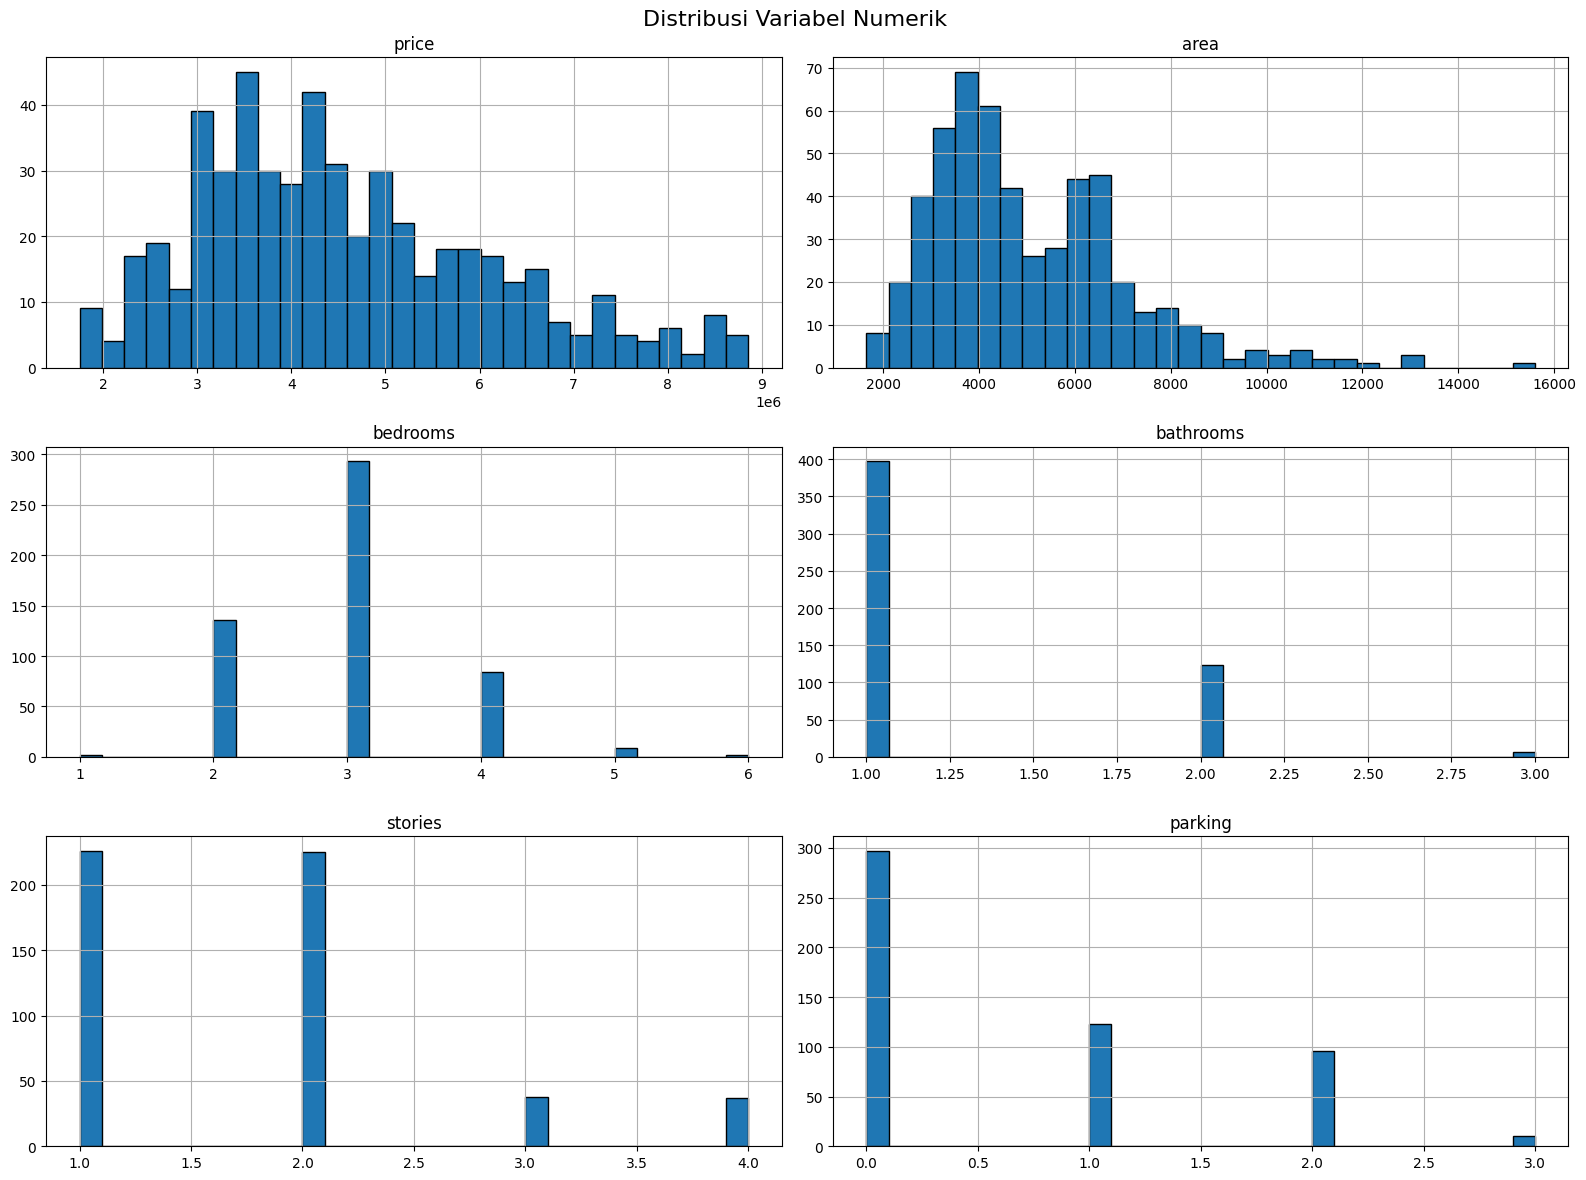

In [110]:
# Distribusi Setiap Variabel Numerik
df.hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.show()

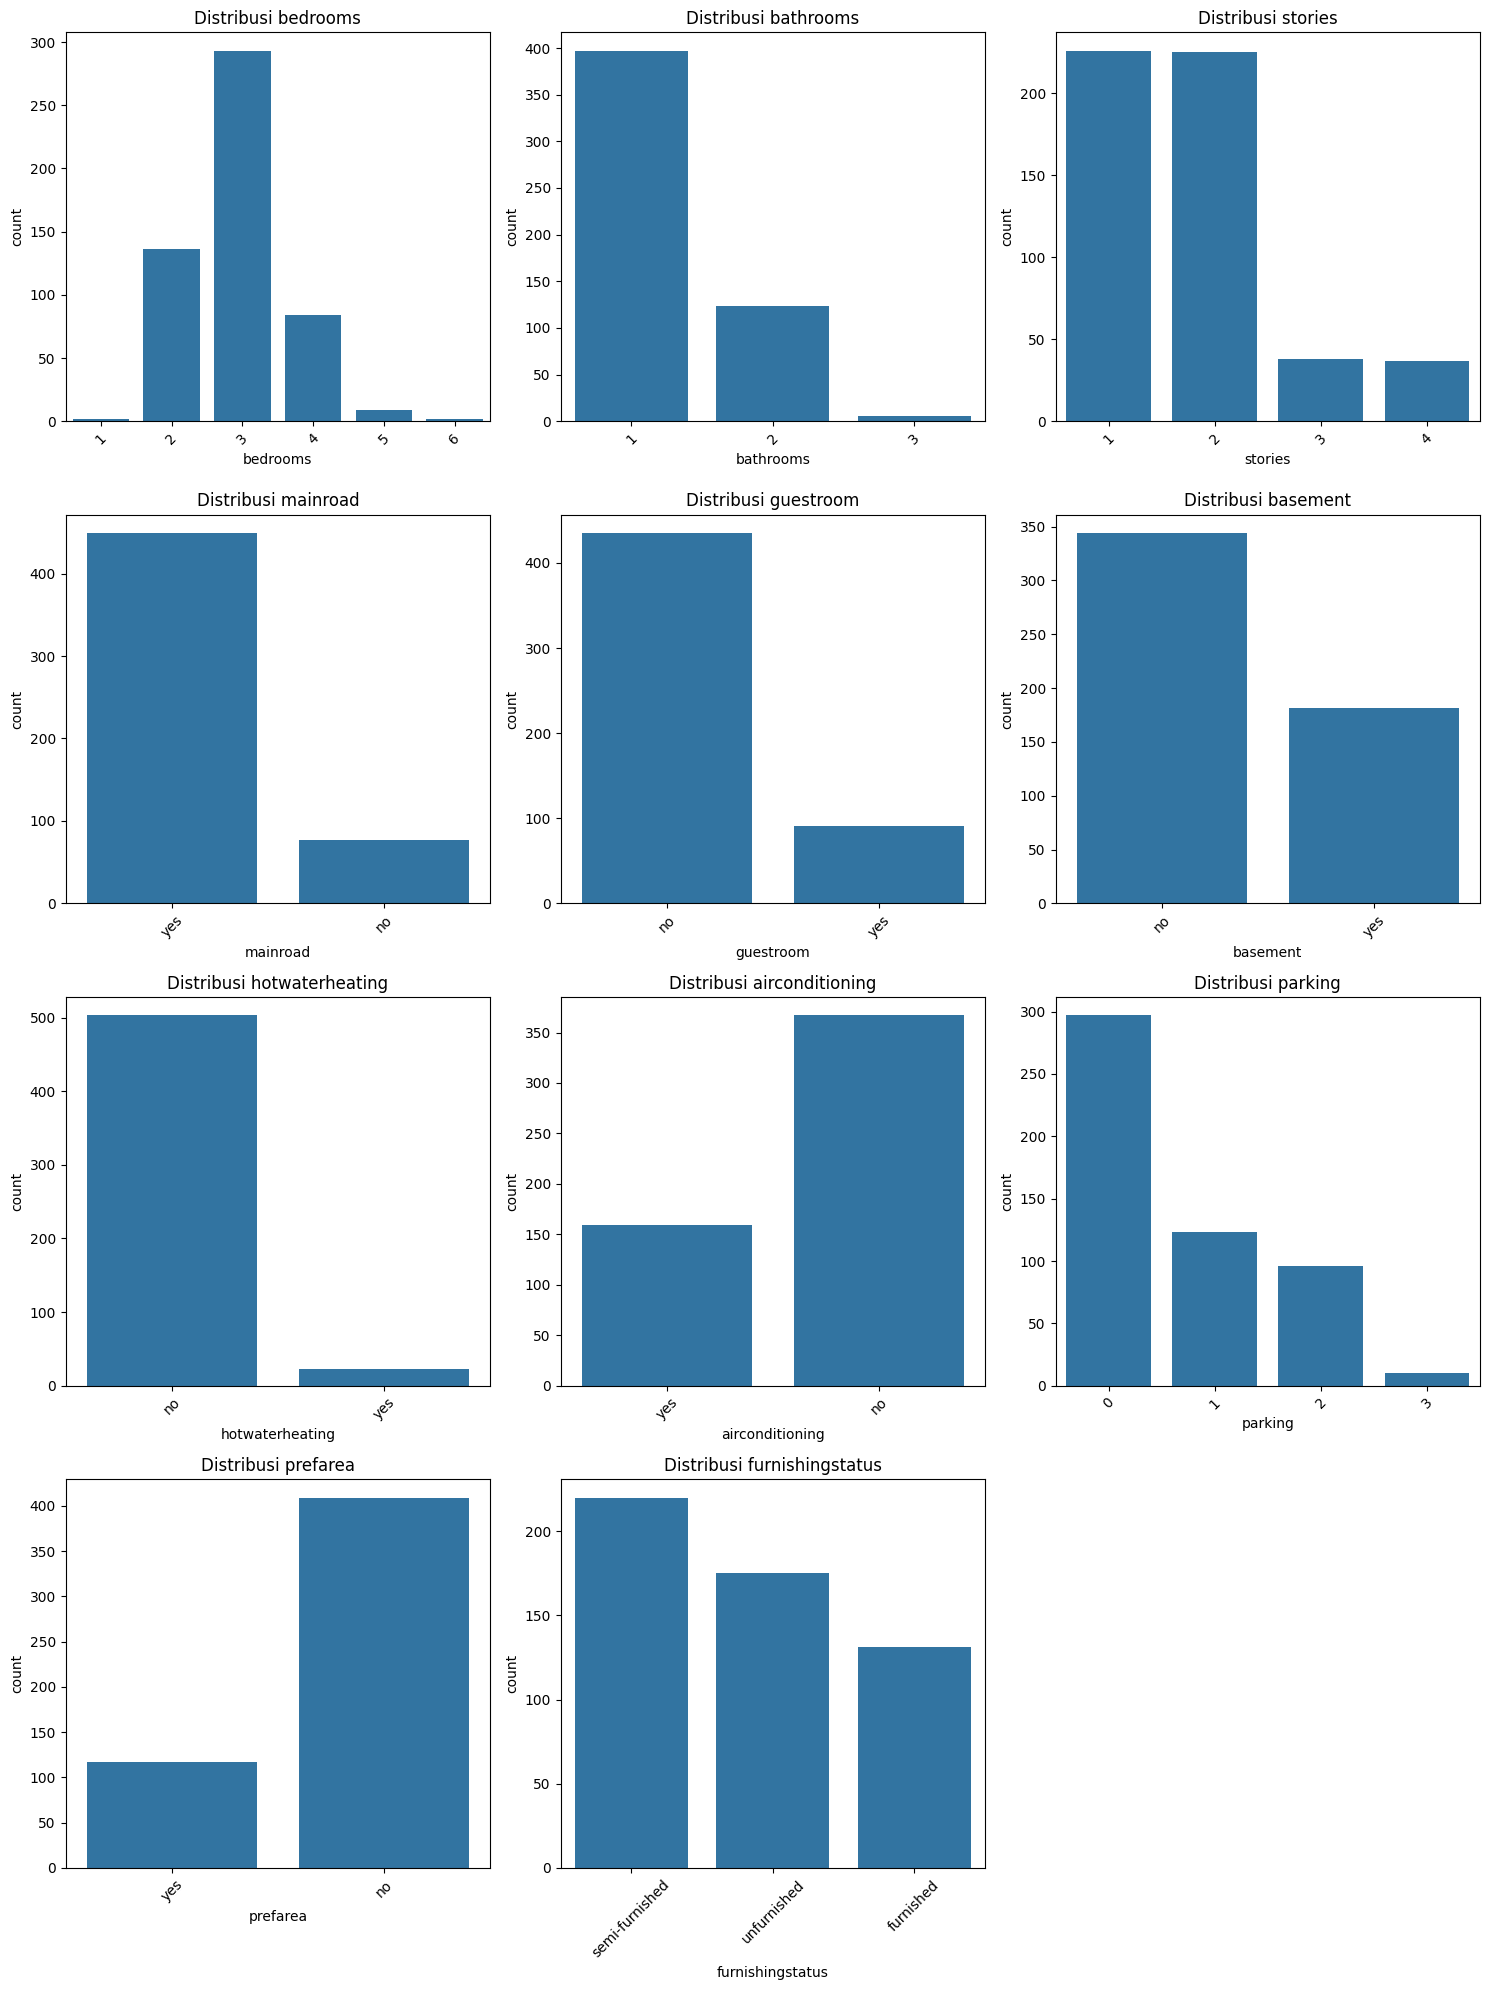

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom kategorikal
cat_col = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype in ['int64', 'object']]

# Atur layout subplot
n = len(cat_col)
rows = (n // 3) + int(n % 3 != 0)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(cat_col):
    plt.subplot(rows, 3, i+1)
    sns.countplot(x=col, data=df)  # <== pakai df, bukan df_log
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



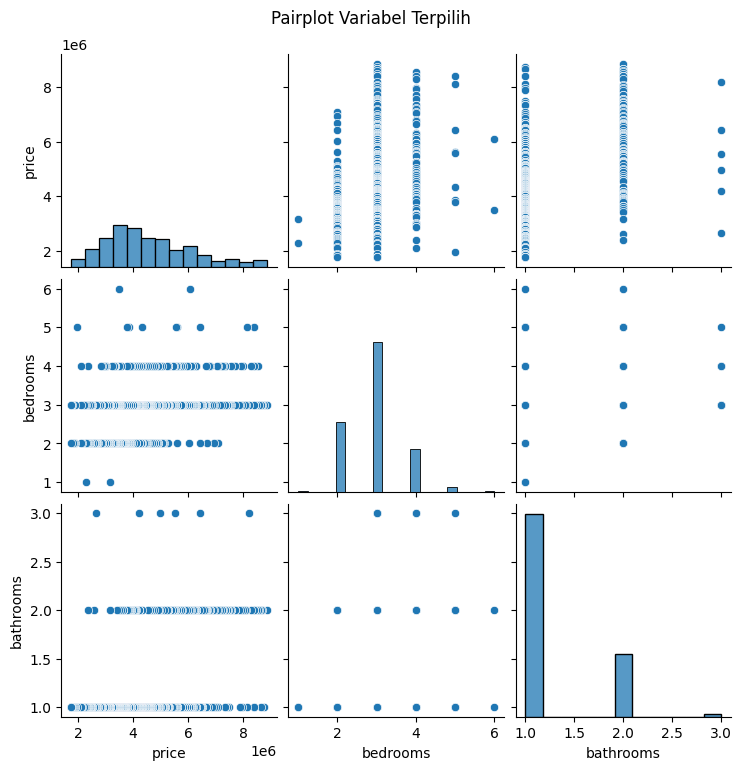

In [117]:
#Pairplot (untuk variabel penting)
# Pilih beberapa kolom numerik yang relevan
selected_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']
selected_cols = [col for col in selected_cols if col in df.columns]
if selected_cols:
    sns.pairplot(df[selected_cols])
    plt.suptitle("Pairplot Variabel Terpilih", y=1.02)
    plt.show()

In [122]:
df_log = df.copy()
df_log['price_log'] = np.log1p(df_log['price'])  # log(1 + price)


In [121]:
num_col = [col for col in df_log.select_dtypes(include=np.number).columns
           if col not in ['price', 'price_log']]


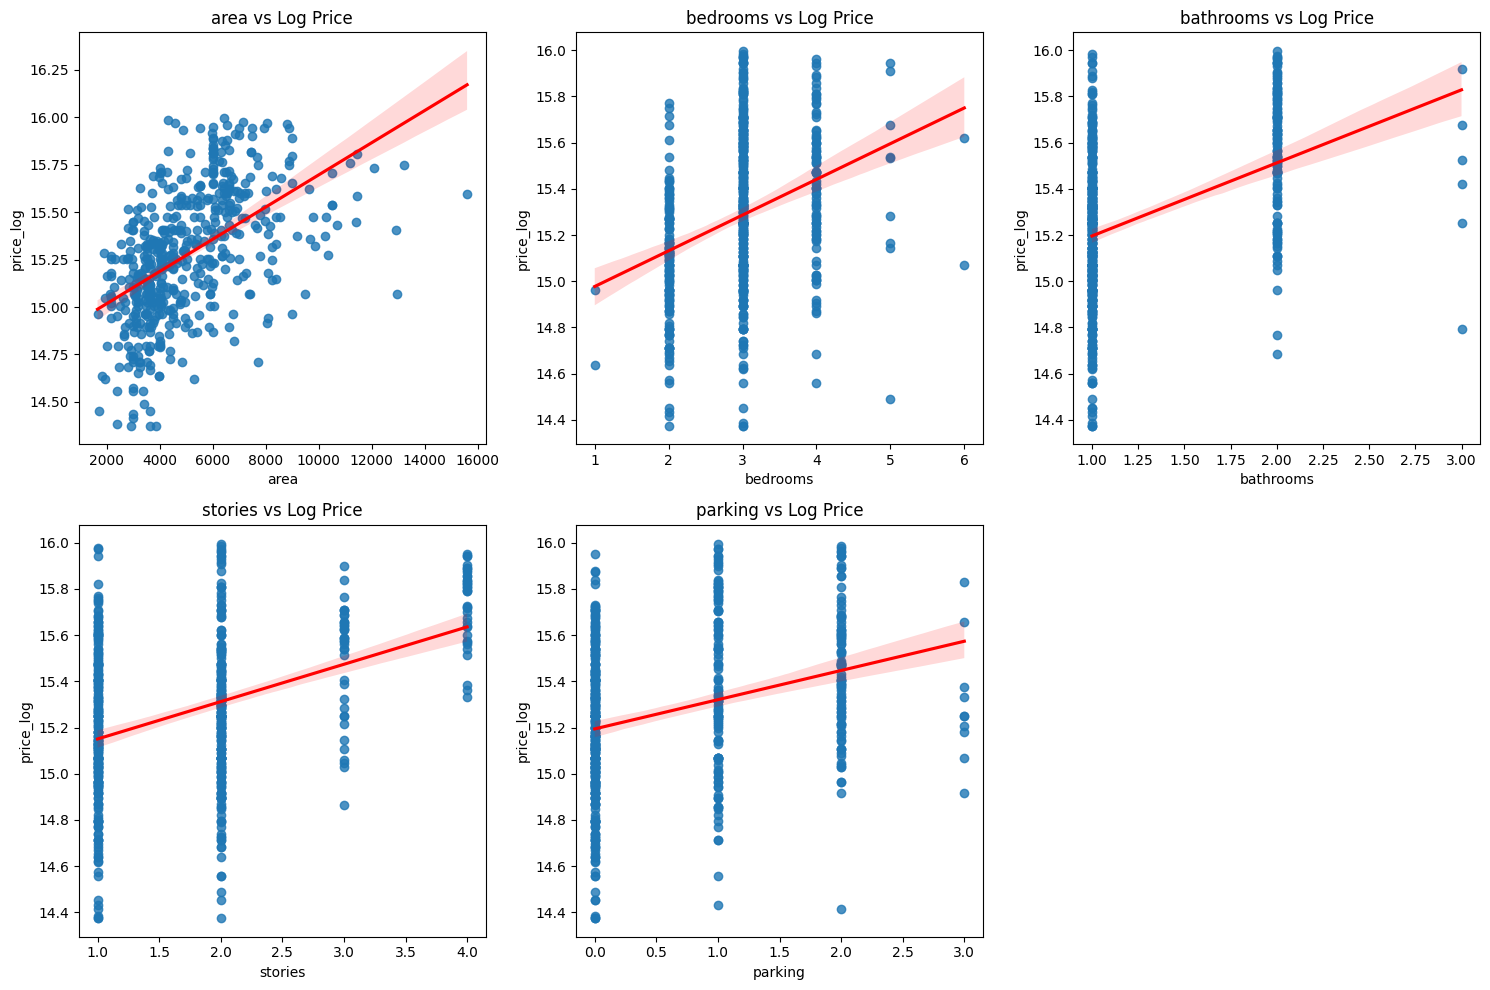

In [123]:
n = len(num_col)
rows = (n // 3) + int(n % 3 != 0)  # jumlah baris berdasarkan jumlah kolom
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_col):
    plt.subplot(rows, 3, i + 1)
    sns.regplot(x=col, y='price_log', data=df_log, line_kws={'color': 'red'})
    plt.title(f'{col} vs Log Price')

plt.tight_layout()
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [127]:
target_col = 'price_log' if 'price_log' in df.columns else 'price'

In [128]:
if 'price_log' not in df.columns:
    df['price_log'] = np.log1p(df['price'])
    target_col = 'price_log'
X = df.drop(columns=['price', 'price_log'], errors='ignore')  # hapus target
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [129]:
print("Ukuran Data:")
print("Training :", X_train.shape)
print("Testing  :", X_test.shape)

Ukuran Data:
Training : (420, 12)
Testing  : (106, 12)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [146]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [150]:
df['price_log'] = np.log1p(df['price'])


In [151]:
X = df.drop(columns=['price', 'price_log'])
y = df['price_log']


In [152]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [154]:
# Membuat prediksi model dengan test set
y_pred = lr_model.predict(X_test)

In [155]:
# Melihat intercept
lr_model.intercept_

np.float64(14.435495375624473)

In [156]:
# Melihat koefisien
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients

,Feature,Coefficient
9,airconditioning_yes,0.163938
2,bathrooms,0.146333
8,hotwaterheating_yes,0.107421
10,prefarea_yes,0.106354
5,mainroad_yes,0.104544
3,stories,0.095578
12,furnishingstatus_unfurnished,-0.090215
7,basement_yes,0.075937
6,guestroom_yes,0.074850
11,furnishingstatus_semi-furnished,0.037417


In [157]:
# Kenaikan AC
np.exp(0.167748) - 1

np.float64(0.18263854817937597)

In [158]:
# Rumah tanpa Furnish
np.exp(-0.115424) - 1

np.float64(-0.10901171522638808)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [159]:
# Mengkalkulasi metrics evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [160]:
# Mengeluarkan hasil
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.6987
MAE: 0.1708
MSE: 0.0503
RMSE: 0.2243


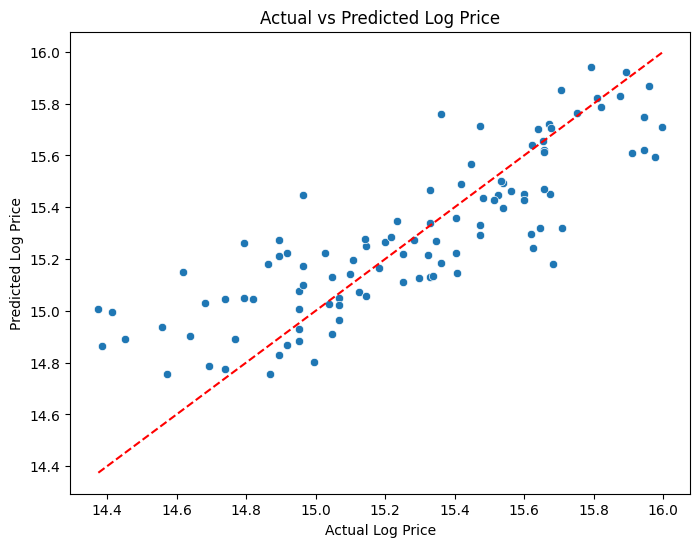

In [162]:
# Plot Prediksi vs Aktual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual vs Predicted Log Price')
plt.show()


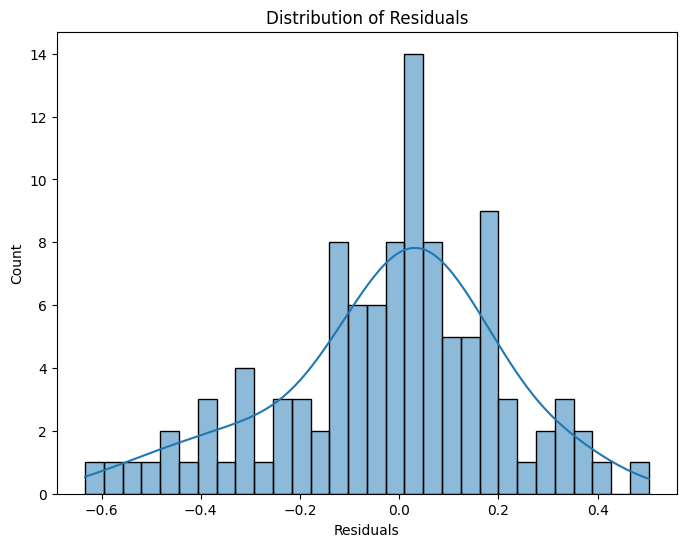

In [163]:
# Plot Residual (Error)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


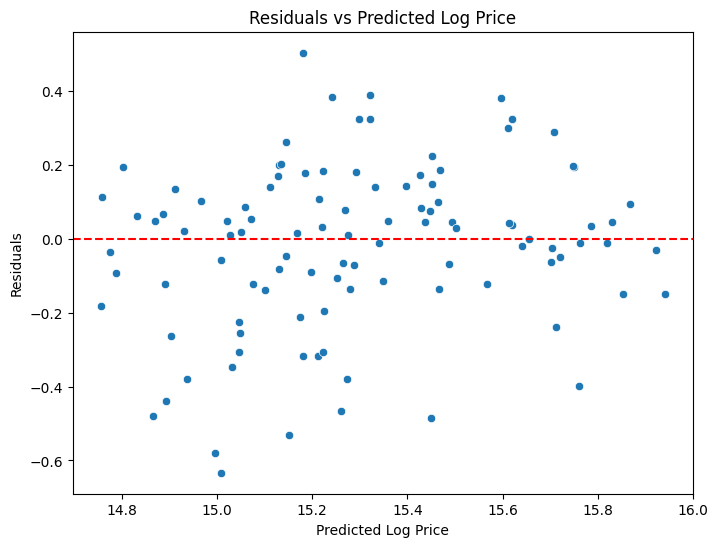

In [164]:
# Residual plot: residuals vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Log Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Price')
plt.show()

In [161]:
#MAE
np.expm1x(0.1676)

np.float64(0.18246353062586385)

- RMSE dan MAE mengukur rata-rata kesalahan prediksi. Nilai yang lebih kecil lebih baik.
- R² menunjukkan seberapa baik model menjelaskan variasi data (maks 1.0).
- Plot Actual vs Predicted seharusnya mendekati garis diagonal merah.
- Residual harus terdistribusi acak di sekitar 0 tanpa pola tertentu untuk asumsi regresi terpenuhi.
""")